# Openclassrooms PJ7 : implement automatic image indexing

In [1]:
%matplotlib inline

#%load_ext autoreload  # Autoreload has a bug : when you modify function in source code and run again, python kernel hangs :(
#%autoreload 2

import datetime as dt

import sys, importlib

from functions import *
importlib.reload(sys.modules['functions'])

import pandas as pd

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import datetime as dt

import os
import zipfile
import urllib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np   
  
import plotly as py
import plotly.graph_objects as go
import ipywidgets as widgets

import qgrid

import glob

from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import GridSearchCV

from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import entropy

from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import Perceptron
from sklearn import tree

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_auc_score

import nltk
import codecs

from sklearn.decomposition import LatentDirichletAllocation

#from nltk.corpus.reader.api import CorpusReader
#from nltk.corpus.reader.api import CategorizedCorpusReader

from nltk import pos_tag, sent_tokenize, wordpunct_tokenize

import pandas_profiling

from bs4 import BeautifulSoup

DATA_PATH = os.path.join("datasets", "stanforddogs")
DATA_PATH = os.path.join(DATA_PATH, "Images")

#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults_20190101-20200620.csv")
#DATA_PATH_FILE_INPUT = os.path.join(DATA_PATH, "QueryResults 20200301-20200620_1.csv")

DATA_PATH_FILE = os.path.join(DATA_PATH, "*.csv")
ALL_FILES_LIST = glob.glob(DATA_PATH_FILE)

ALL_FEATURES = []

plt.rcParams["figure.figsize"] = [16,9] # Taille par défaut des figures de matplotlib

import seaborn as sns
from seaborn import boxplot
sns.set()

#import common_functions

####### Paramètres pour sauver et restaurer les modèles :
import pickle
####### Paramètres à changer par l'utilisateur selon son besoin :

'''
RECOMPUTE_GRIDSEARCH = True  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = False # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX
                          # Grid search results are loaded with full samples (SAMPLED_DATA must be False)
'''


RECOMPUTE_GRIDSEARCH = False  # CAUTION : computation is several hours long
SAVE_GRID_RESULTS = False # If True : grid results object will be saved to pickle files that have GRIDSEARCH_FILE_PREFIX
LOAD_GRID_RESULTS = True # If True : grid results object will be loaded from pickle files that have GRIDSEARCH_FILE_PREFIX

#GRIDSEARCH_CSV_FILE = 'grid_search_results.csv'

GRIDSEARCH_FILE_PREFIX = 'grid_search_results_'

# Set this to load (or train again / save) KNN model to disk
SAVE_KNN_MODEL = False
LOAD_KNN_MODEL = True

KNN_FILE_MODEL_PREFIX = 'knn_model'


# Set this to load (or train again / save) second KNN model to disk  
#  (in "Implementation of KNN classification algorithm on 9000 instances all of which have at least 1 label" part)
#  (and also in "Same as 1/ but with predict proba instead of predict" part)
SAVE_KNN_MODEL2 = False
LOAD_KNN_MODEL2 = True

# Set this to load (or predict again / save) probabilites prediction on model 2 to disk  (in "Same as 1/ but with predict proba instead of predict" part)
SAVE_KNN_MODEL2_PROBA = False
LOAD_KNN_MODEL2_PROBA = True


KNN_FILE_MODEL_PREFIX2 = 'knn_model2'

SAVE_BESTGRIDSEARCH_MODEL = False
LOAD_BESTGRIDSEARCH_MODEL = True
BESTGRIDSEARCH_FILE_MODEL_PREFIX = 'bestgridsearch_model_'

EXECUTE_INTERMEDIATE_MODELS = True # If True: every intermediate model (which results are manually analyzed in the notebook) will be executed


# Necessary for predictors used in the notebook :
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures

### For progress bar :
from tqdm import tqdm_notebook as tqdm

# Statsmodel : 
import statsmodels.formula.api as smf

import statsmodels.api as sm
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from nltk.cluster import KMeansClusterer # NLTK algorithm will be useful for cosine distance

SAVE_API_MODEL = True # If True : API model ill be saved
API_MODEL_PICKLE_FILE = 'API_model_PJ7.pickle'


LEARNING_CURVE_STEP_SIZE = 100


/home/francois/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Image settings

In [2]:
from PIL import Image
from io import BytesIO

In [3]:
import cv2

# Exploration of 1 image from OC course

In [4]:
img = Image.open("simba.png") 

In [5]:
np_img = np.array(img)

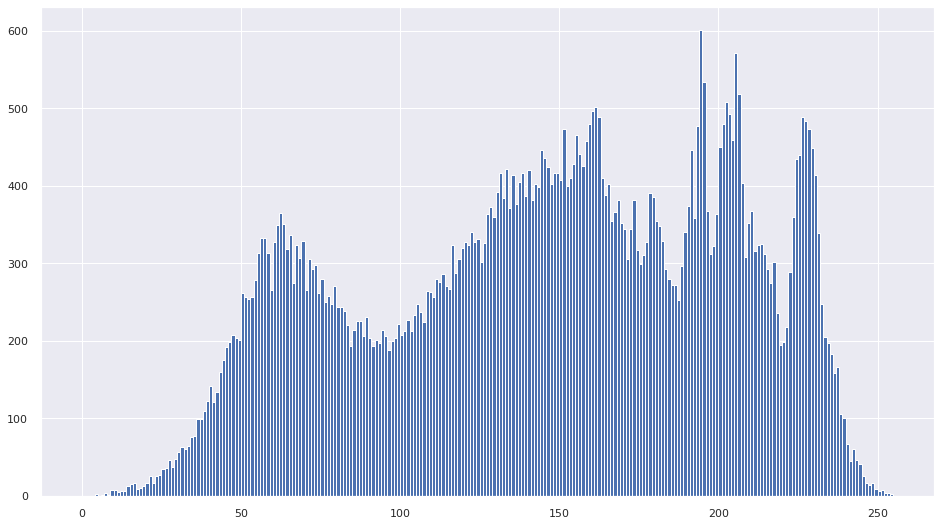

In [6]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256))
plt.show()

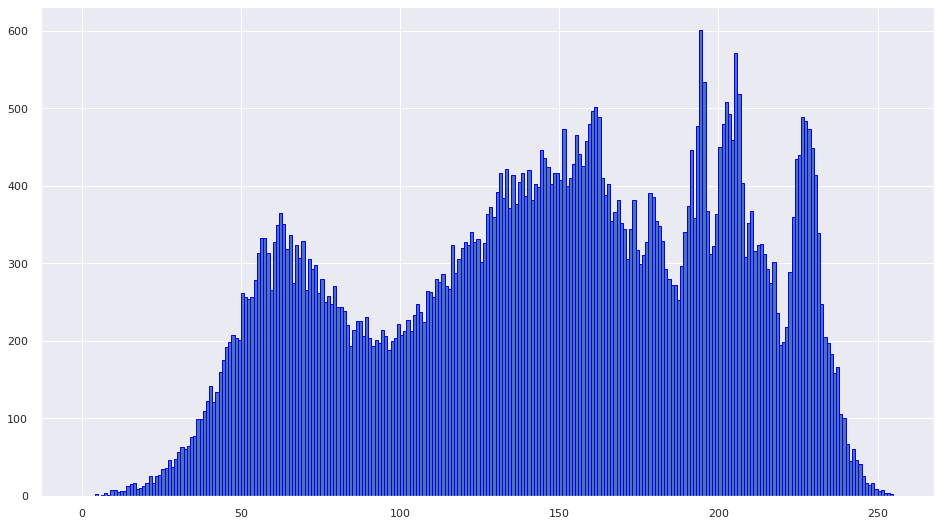

In [7]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256), edgecolor='blue')
plt.show()

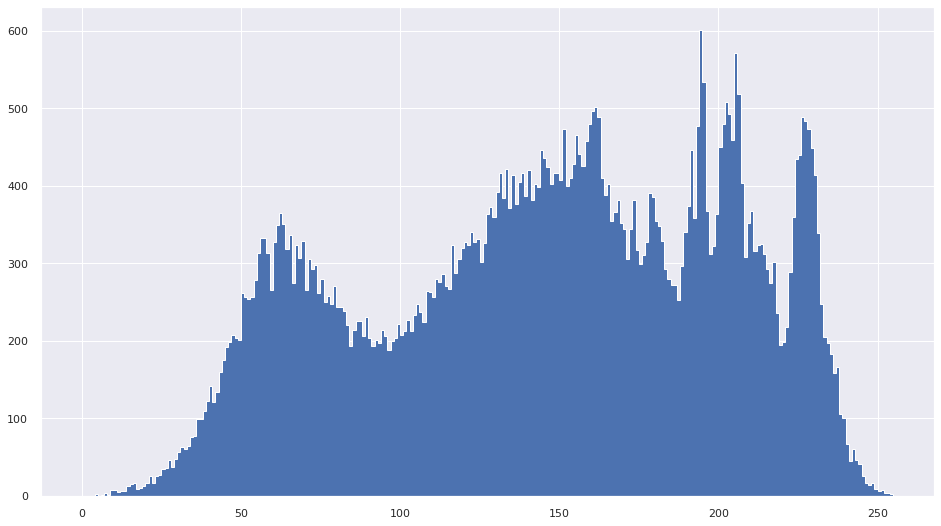

In [8]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256), histtype='stepfilled')
plt.show()

# Exploration of 1 image

In [9]:
PATH_TESTIMAGE = DATA_PATH + "/n02111889-Samoyed/" + "n02111889_1363.jpg"
img = Image.open(PATH_TESTIMAGE) 

In [10]:
'n02108422-bull_mastiff'.split('-')[1]

'bull_mastiff'

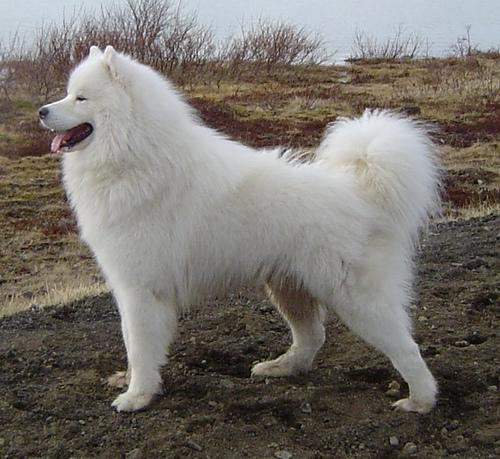

In [11]:
display(img)

In [12]:
img.size

(500, 459)

In [13]:
img.mode

'RGB'

In [14]:
img.getpixel((20, 100))

(101, 95, 69)

In [15]:
np_image = np.array(img)

In [16]:
np_image.shape

(459, 500, 3)

In [17]:
np.array([1,2,3])

array([1, 2, 3])

In [18]:
np_img = np.array(img)

In [19]:
np_img[:, :, 0]

array([[205, 205, 205, ..., 189, 189, 189],
       [204, 204, 204, ..., 188, 188, 188],
       [203, 203, 203, ..., 188, 188, 188],
       ...,
       [ 49,  72,  74, ...,  63,  68,  78],
       [ 36,  62,  73, ...,  63,  65,  72],
       [ 51,  63,  65, ...,  62,  62,  64]], dtype=uint8)

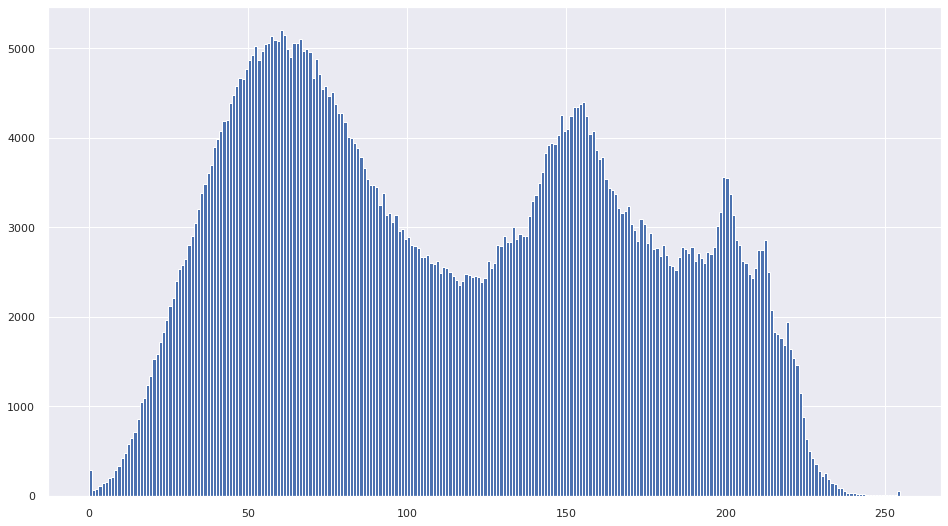

In [20]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img.flatten(), bins=range(256))
plt.show()

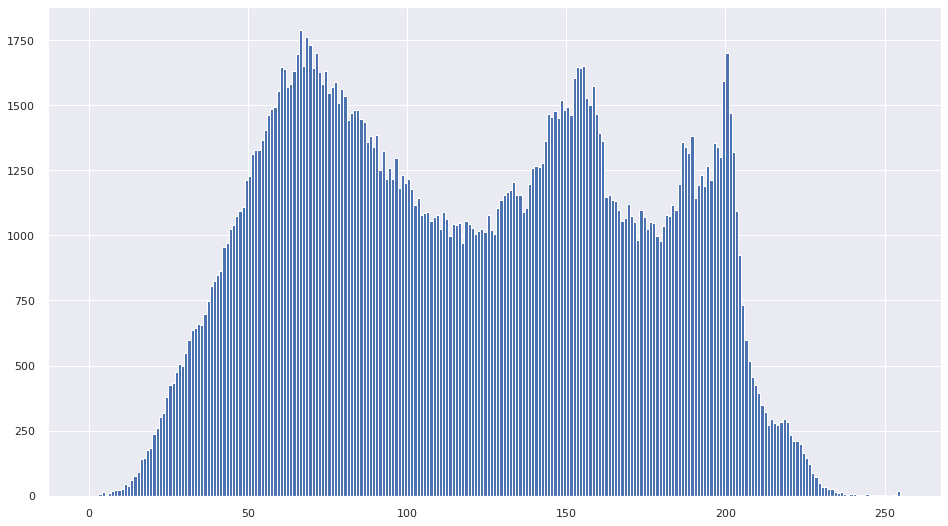

In [21]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img[:, :, 0].flatten(), bins=range(256))
plt.show()

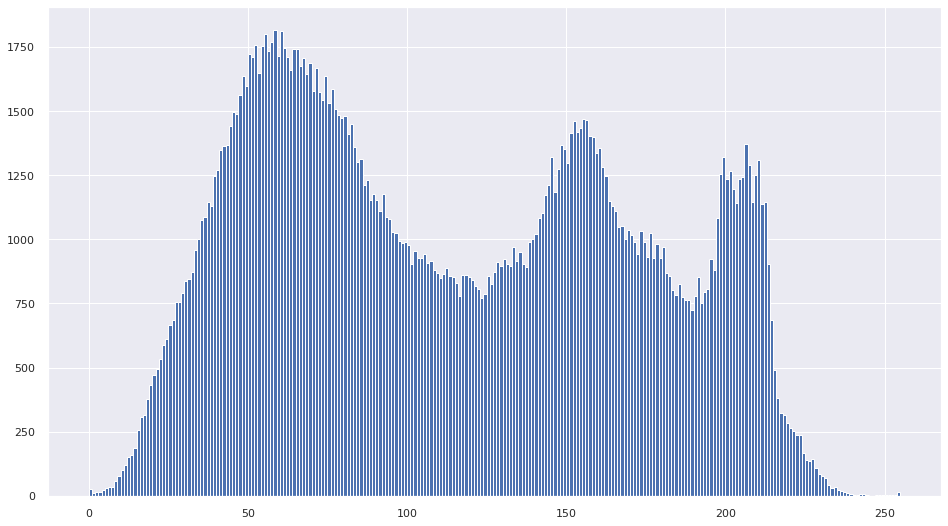

In [22]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img[:, :, 1].flatten(), bins=range(256))
plt.show()

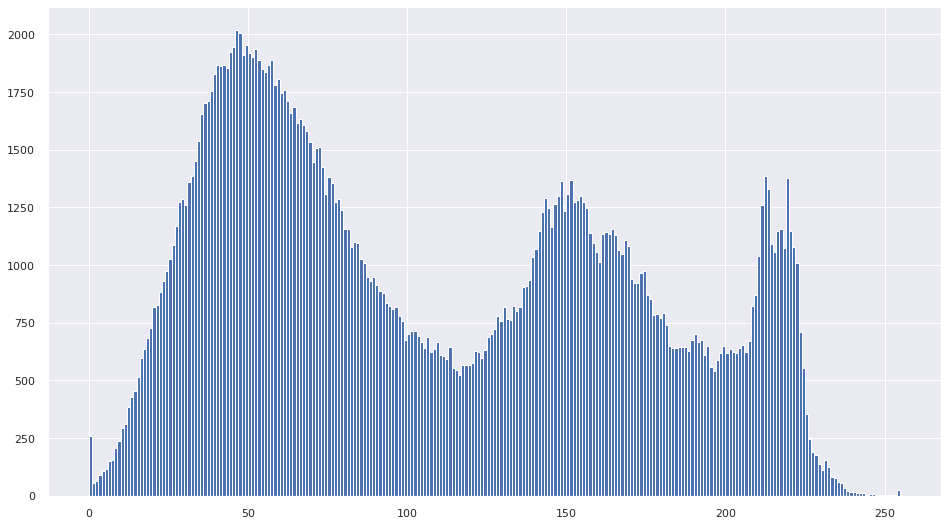

In [23]:
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True

n, bins, patches = plt.hist(np_img[:, :, 2].flatten(), bins=range(256))
plt.show()

# Image preprocessing tests

In [24]:
imgcv = cv2.imread(PATH_TESTIMAGE)

In [25]:
imgcv_gray = cv2.cvtColor(imgcv,cv2.COLOR_BGR2GRAY)

In [26]:
imgcv_gray.shape

(459, 500)

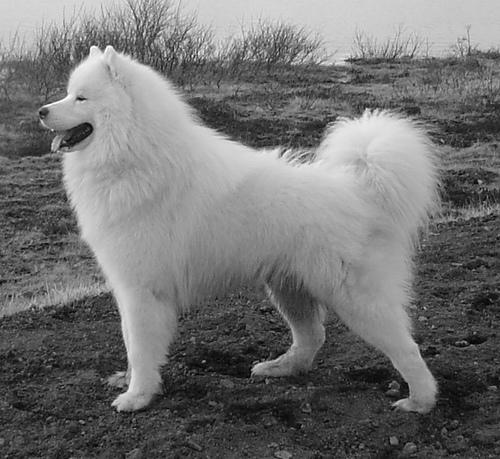

In [27]:
Image.fromarray(imgcv_gray)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()

In [30]:
sift

<xfeatures2d_SIFT 0x7fd4d5a7f6d0>

In [35]:
kp = sift.detect(imgcv_gray,None)

imgcv_keypoints = cv2.drawKeypoints(imgcv_gray, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, outImage=None)

cv2.imwrite('sift_keypoints.jpg',imgcv_keypoints)


True

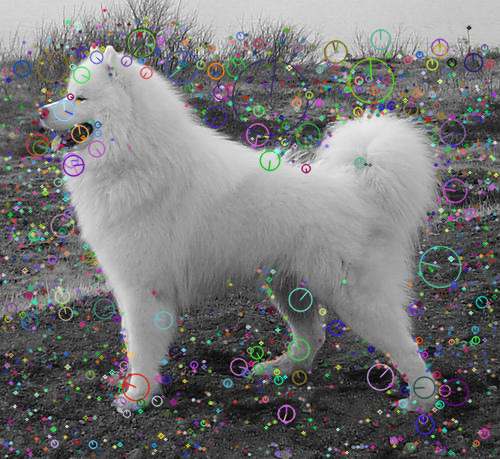

In [48]:
Image.fromarray(imgcv_keypoints)

In [40]:
kp, des = sift.detectAndCompute(imgcv_gray,None)

In [39]:
len(kp)

1660

In [41]:
des.shape

(1660, 128)

In [47]:
flann_params = dict(algorithm = 1, trees = 5)
matcher = cv2.FlannBasedMatcher(flann_params, {}) 
bow_extract = cv2.BOWImgDescriptorExtractor( sift , matcher )
#bow_extract.setVocabulary( vocab ) # the 64x20 dictionary, you made before # <= selon la doc:  Each row of the vocabulary is a visual word (cluster center). 

TypeError: vocabulary is not a numpy array, neither a scalar

In [46]:
bowsig = bow_extract.compute(imgcv_gray, kp)

error: OpenCV(3.4.2) /io/opencv/modules/features2d/src/bagofwords.cpp:179: error: (-215:Assertion failed) !vocabulary.empty() in function 'compute'


# Load images and labels

In [14]:
filename_images = []
np_images = []
labels = []

i = 0

In [15]:
for root, dirs, files in os.walk(DATA_PATH):
    path = root.split(os.sep)
    
    for file in files:
        # Append filename to global list
        filename_images.append(os.path.join(root, file))
        
        # Append image numpy array to global list
        im = Image.open(os.path.join(root, file))
        np_images.append(np.array(im))  # <= Takes too much memory (compared to jpeg disk space usage) : for later, either fix memory problem, or stream files from disk
        im.close()
        
        # Append image label to global list (we use the part of directory name after the '-'character as label)
        labels.append(os.path.basename(root).split('-')[1])

        # Limitation for now, because of memory
        i += 1
        
        if (i > 10):
            break
        

In [16]:
sys.getsizeof(np_images)

1256

In [22]:
np_images[100].nbytes

744000

In [23]:
np_images[100].dtype

dtype('uint8')

In [24]:
np_images[100].shape

(496, 500, 3)

In [32]:
np_images[50]

array([[[ 56,  81,  51],
        [ 70,  95,  63],
        [ 63,  89,  54],
        ...,
        [ 77,  92,  63],
        [104, 119,  90],
        [113, 126, 100]],

       [[ 30,  55,  25],
        [ 42,  67,  35],
        [ 35,  61,  26],
        ...,
        [ 85,  99,  73],
        [137, 150, 124],
        [164, 174, 149]],

       [[ 18,  43,  13],
        [ 28,  53,  23],
        [ 26,  51,  19],
        ...,
        [ 94, 104,  80],
        [158, 166, 145],
        [187, 195, 174]],

       ...,

       [[210, 234, 138],
        [205, 229, 133],
        [196, 220, 126],
        ...,
        [188, 217, 125],
        [169, 199, 103],
        [168, 199,  96]],

       [[195, 219, 123],
        [197, 221, 125],
        [200, 224, 130],
        ...,
        [181, 210, 118],
        [160, 190,  92],
        [162, 193,  89]],

       [[176, 200, 104],
        [183, 207, 111],
        [195, 219, 125],
        ...,
        [176, 205, 112],
        [154, 184,  84],
        [158, 190,  83]]

In [27]:
len(filename_images)

130

In [16]:
labels[50]

'bull_mastiff'

# Annex (old code)

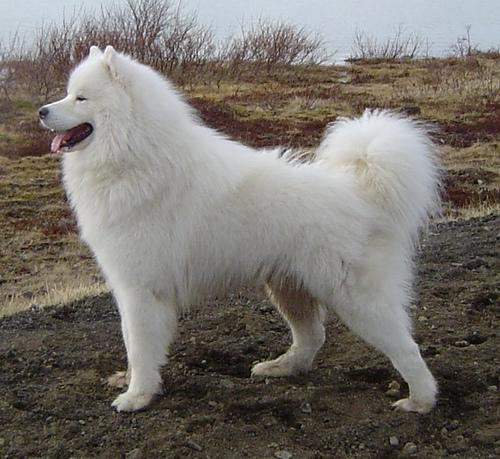

In [6]:
img = Image.open(DATA_PATH + "/n02111889-Samoyed/" + "n02111889_1363.jpg") 

temp = BytesIO()
img.save(temp, format="png")
display(Image.open(temp))

In [26]:
# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk(DATA_PATH):
    path = root.split(os.sep)
    #print((len(path) - 1) * 'p---', os.path.basename(root))
    
    for file in files:
        print(os.path.join(root, file))
        print(len(path) * '---', file)
        print(len(path) * '---', os.path.basename(root).split('-')[1])

datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_5260.jpg
------------ n02108422_5260.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_2203.jpg
------------ n02108422_2203.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_3235.jpg
------------ n02108422_3235.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_4396.jpg
------------ n02108422_4396.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_1096.jpg
------------ n02108422_1096.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_4064.jpg
------------ n02108422_4064.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_844.jpg
------------ n02108422_844.jpg
------------ bull_mastiff
datasets/stanforddogs/Images/n02108422-bull_mastiff/n02108422_2471.jpg
------------ n02108422_2471.